## COMMENT CLASSIFICATION¶

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 41 kB 204 kB/s eta 0:00:01
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30536 sha256=e480de258022b41b054c67be0652ccc6ac3de03d0cabadc472a2d910e7ebad0a
  Stored in directory: /Users/prajwalkunder/Library/Caches/pip/wheels/ab/a4/72/df07592cea3ae06b5e846f5e52262f8b16748e829ca354b7df
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19471 sha256=f4a585c592543d6bb048f971b684456499b48978256e621b726f4876437d407a
  Stored in directory: /Users/prajwalkunder/Library/Caches/pip/wheels/c7/f3/85/b8cf1d8bfe55dc2ece0f1fcd4e91d6f8fc7b59ff3fd75329e1
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7910 sha256=0a9faa86b9f49b04eae7b637ac97721a3aeb7b0908f666fa1a5216764d83d727
  Stored in directory: /Users/prajwalkunder/Library/Caches/pip/wheels/ac/26/e9/df16869ccbd4abf517f1ff3be9a2c7ee5c5980fc87eea04fb1
Successfully built bert-for-tf2 params-flow py-params
     |████

open the anaconda prompt as the administrator and past the below code
conda create -n tensorflow python=3.5

In [7]:
#Reading xlx File
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [8]:
#Top 5 Rows
train_data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
#Summary Of DataFrame
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


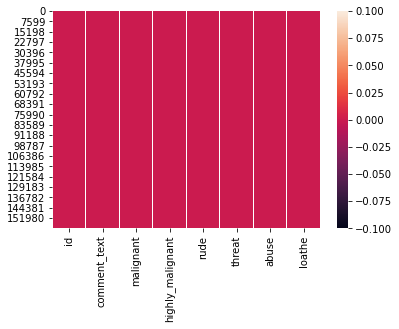

In [53]:
# checking null values
print(train_data.isnull().sum())
print(sns.heatmap(train_data.isnull()))

AxesSubplot(0.125,0.125;0.62x0.755)


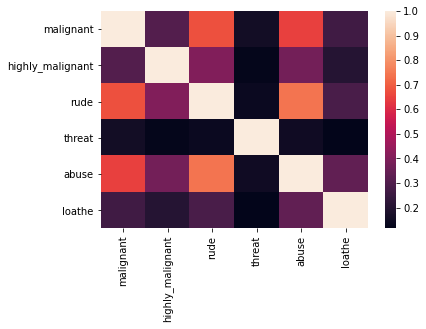

In [54]:
#checking correlation 
print(sns.heatmap(train_data.corr()))

In [55]:
# checking the skewness for the features:
train_data.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

In [ ]:
# ID & comment_text are objecttype

In [16]:
column_list = [f for f in train_data.columns if train_data.dtypes[f] != 'object'] 
df = pd.DataFrame(columns=column_list)
for col in column_list:
    df.loc[0,col] = train_data[train_data[col] == 1][col].sum()
df['abuse'] = train_data.shape[0] - df.sum(axis=1) 

In [17]:
df

,malignant,highly_malignant,rude,threat,abuse,loathe
0,15294,1595,8449,478,124473.0,1405


In [ ]:
#Visualization

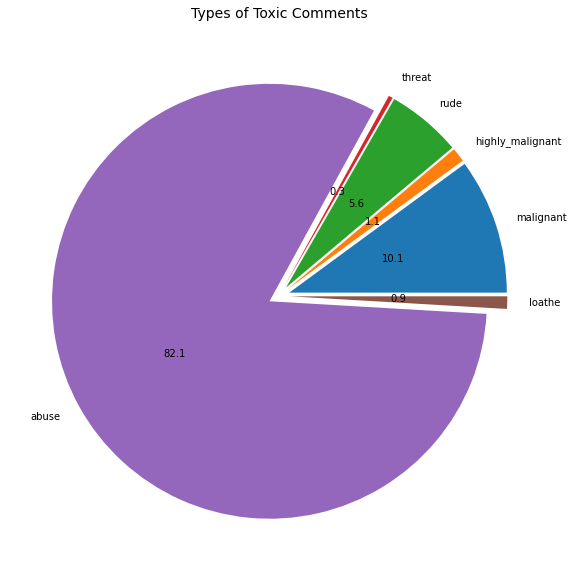

In [18]:
#using pyplot-types of toxic comments
pie, ax = plt.subplots(figsize=[12,10])
labels = df.keys()
plt.pie(x=df.values[0], autopct="%.1f", explode=[0.05]*len(df.values[0]), labels=labels, pctdistance=0.5)
plt.title("Types of Toxic Comments", fontsize=14);
pie.savefig("ToxicCommentsChart.png")

In above Pie Chart More than 80% are abuse And threats(comments) are 0.3

In [19]:
#Showing First five rowstest_data dataset
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [20]:
#showing all the columns
train_data.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

<AxesSubplot:xlabel='malignant'>

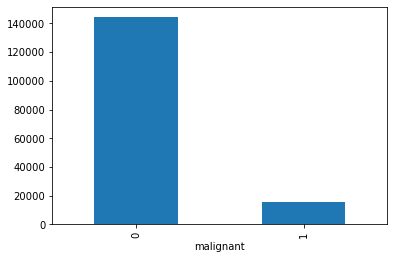

In [22]:
#Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
train_data.groupby(['malignant'])["comment_text"].count().plot(kind="bar")

In [23]:
#The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES

<AxesSubplot:xlabel='highly_malignant'>

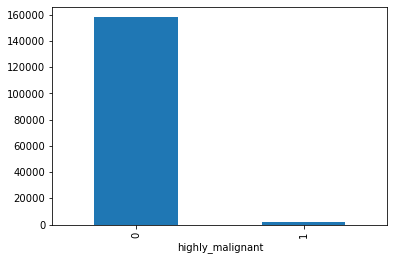

In [24]:
train_data.groupby(['highly_malignant'])["comment_text"].count().plot(kind="bar")

<AxesSubplot:xlabel='rude'>

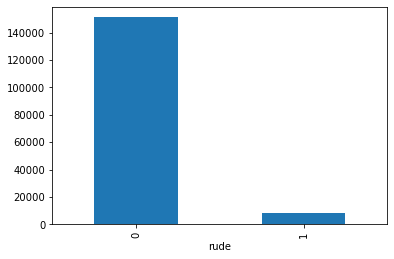

In [25]:
train_data.groupby(['rude'])["comment_text"].count().plot(kind="bar")

<AxesSubplot:xlabel='threat'>

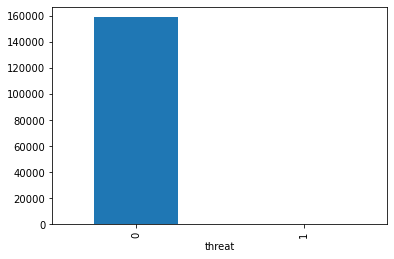

In [26]:
train_data.groupby(['threat'])["comment_text"].count().plot(kind="bar")

<AxesSubplot:xlabel='abuse'>

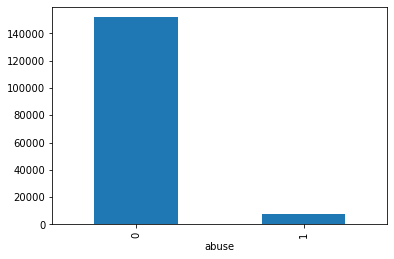

In [27]:
train_data.groupby(['abuse'])["comment_text"].count().plot(kind="bar")

<AxesSubplot:xlabel='loathe'>

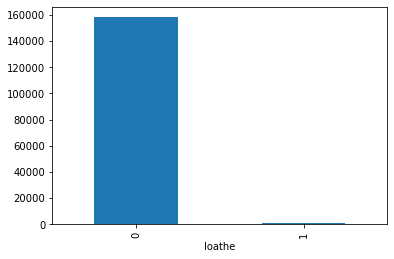

In [28]:
train_data.groupby(['loathe'])["comment_text"].count().plot(kind="bar")

In [29]:
df.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,15294,1595,8449,478,124473.0,1405


In [30]:
# cleaning the dataset
def clean_comment(comment):
    # Removing the @
    comment = re.sub(r"@[A-Za-z0-9]+", ' ', comment)
    # Removing the URL links
    comment = re.sub(r"https?://[A-Za-z0-9./]+", ' ', comment)
    # Keeping only letters
    comment = re.sub(r"[^a-zA-Z.!?']", ' ', comment)
    # Removing additional whitespaces
    comment = re.sub(r" +", ' ', comment)
    return comment

In [32]:
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: clean_comment(x))

In [33]:
train_data.head() # checking first five rows

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man I'm really not trying to edit war. It'...,0,0,0,0,0,0
3,0001b41b1c6bb37e,More I can't make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero. Any chance you remember w...,0,0,0,0,0,0


In [34]:
data_clean = train_data.comment_text.values
data_labels = train_data.drop(columns=['comment_text'],axis=1).values

In [35]:
data_clean

array(["Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now. . . . ",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks. talk January UTC ",
       "Hey man I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer Umm theres no actual article for prostitution ring. Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       " And ... I really don't think you understand. I came here and my idea was bad right away. What kind of community goes you have bad ideas go away instead

In [57]:
train_data.shape

(159571, 8)

In [59]:
test_data.shape

(153164,)

In [36]:
X=train_data.comment_text.values

In [37]:
y=train_data[['malignant','highly_malignant','rude','threat','abuse','loathe']]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
# Feature engineering using classifier such as CountVectorizer TfidfVectorizer , Naive bayes
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline #final estimator

In [41]:
# checking the score-accuracy of the model
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])# acciracy

for i in y:
    model.fit(X_train, y_train[i])
    prediction = model.predict(X_test)

    print('Test accuracy is {}'.format(accuracy_score(y_test[i], prediction)))

Test accuracy is 0.9561708349949676
Test accuracy is 0.990960709470366
Test accuracy is 0.9760154959266222
Test accuracy is 0.9973413851383429
Test accuracy is 0.9700526025940485
Test accuracy is 0.9918152642473271


In [42]:
#checing the model with example
example = [" Any chance you remember. "]
result = model.predict(example)

In [46]:
#output prediction
result

array([0])

In [47]:
df1 = pd.read_csv('test.csv')

In [48]:
test_data=df1.comment_text   #saving dataset

In [49]:
result = model.predict(test_data)#checking again

In [50]:
result

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
df1["Predicted_result"]=result

In [52]:
#cretaing csv file
pd2=df1.to_csv("Predicted_output.csv") 